# lab 9

In [1]:
!pip install pymongo

     |████████████████████████████████| 506 kB 23.8 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 241 kB 23.8 MB/s eta 0:00:01    |█████████████▌                  | 102 kB 23.8 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

     |████████████████████████████████| 64 kB 4.0 MB/s  eta 0:00:01
     |████████████████████████████████| 146 kB 57.6 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

     |████████████████████████████████| 50 kB 8.3 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

In [8]:
client = MongoClient(mongod_connect)
db = client.lab9 # use or create a database named lab9
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

In [9]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

In [10]:
count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"

In [11]:
search_results = rest_api.search.tweets(count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Sun Nov 07 17:34:20 +0000 2021'
'Sun Nov 07 17:34:20 +0000 2021'
'Sun Nov 07 17:34:19 +0000 2021'
'Sun Nov 07 17:34:19 +0000 2021'
'Sun Nov 07 17:34:18 +0000 2021'
'Sun Nov 07 17:34:17 +0000 2021'
'Sun Nov 07 17:34:17 +0000 2021'
'Sun Nov 07 17:34:15 +0000 2021'
'Sun Nov 07 17:34:14 +0000 2021'
'Sun Nov 07 17:34:14 +0000 2021'
'Sun Nov 07 17:34:12 +0000 2021'
'Sun Nov 07 17:34:11 +0000 2021'
'Sun Nov 07 17:34:10 +0000 2021'
'Sun Nov 07 17:34:09 +0000 2021'
'Sun Nov 07 17:34:07 +0000 2021'
'Sun Nov 07 17:34:07 +0000 2021'
'Sun Nov 07 17:34:07 +0000 2021'
'Sun Nov 07 17:34:07 +0000 2021'
'Sun Nov 07 17:34:05 +0000 2021'
'Sun Nov 07 17:34:04 +0000 2021'
'Sun Nov 07 17:34:04 +0000 2021'
'Sun Nov 07 17:34:03 +0000 2021'
'Sun Nov 07 17:34:03 +0000 2021'
'Sun Nov 07 17:34:02 +0000 2021'
'Sun Nov 07 17:34:01 +0000 2021'
'Sun Nov 07 17:34:00 +0000 2021'
'Sun Nov 07 17:34:00 +0000 2021'
'Sun Nov 07 17:34:00 +0000 2021'
'Sun Nov 07 17:33:59 +0000 2021'
'Sun Nov 07 17:33:59 +0000 2021'
'Sun Nov 0

In [13]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                         max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Sun Nov 07 17:33:11 +0000 2021'
'Sun Nov 07 17:33:11 +0000 2021'
'Sun Nov 07 17:33:10 +0000 2021'
'Sun Nov 07 17:33:10 +0000 2021'
'Sun Nov 07 17:33:10 +0000 2021'
'Sun Nov 07 17:33:09 +0000 2021'
'Sun Nov 07 17:33:08 +0000 2021'
'Sun Nov 07 17:33:07 +0000 2021'
'Sun Nov 07 17:33:07 +0000 2021'
'Sun Nov 07 17:33:06 +0000 2021'
'Sun Nov 07 17:33:05 +0000 2021'
'Sun Nov 07 17:33:05 +0000 2021'
'Sun Nov 07 17:33:04 +0000 2021'
'Sun Nov 07 17:33:03 +0000 2021'
'Sun Nov 07 17:33:03 +0000 2021'
'Sun Nov 07 17:33:02 +0000 2021'
'Sun Nov 07 17:33:02 +0000 2021'
'Sun Nov 07 17:33:02 +0000 2021'
'Sun Nov 07 17:33:01 +0000 2021'
'Sun Nov 07 17:33:01 +0000 2021'
'Sun Nov 07 17:33:00 +0000 2021'
'Sun Nov 07 17:33:00 +0000 2021'
'Sun Nov 07 17:33:00 +0000 2021'
'Sun Nov 07 17:33:00 +0000 2021'
'Sun Nov 07 17:32:59 +0000 2021'
'Sun Nov 07 17:32:59 +0000 2021'
'Sun Nov 07 17:32:56 +0000 2021'
'Sun Nov 07 17:32:55 +0000 2021'
'Sun Nov 07 17:32:55 +0000 2021'
'Sun Nov 07 17:32:55 +0000 2021'
'Sun Nov 0

'Sun Nov 07 17:30:37 +0000 2021'
'Sun Nov 07 17:30:36 +0000 2021'
'Sun Nov 07 17:30:36 +0000 2021'
'Sun Nov 07 17:30:36 +0000 2021'
'Sun Nov 07 17:30:36 +0000 2021'
'Sun Nov 07 17:30:35 +0000 2021'
'Sun Nov 07 17:30:35 +0000 2021'
'Sun Nov 07 17:30:35 +0000 2021'
'Sun Nov 07 17:30:34 +0000 2021'
'Sun Nov 07 17:30:33 +0000 2021'
'Sun Nov 07 17:30:32 +0000 2021'
'Sun Nov 07 17:30:32 +0000 2021'
'Sun Nov 07 17:30:31 +0000 2021'
'Sun Nov 07 17:30:31 +0000 2021'
'Sun Nov 07 17:30:31 +0000 2021'
'Sun Nov 07 17:30:30 +0000 2021'
'Sun Nov 07 17:30:29 +0000 2021'
'Sun Nov 07 17:30:29 +0000 2021'
'Sun Nov 07 17:30:27 +0000 2021'
'Sun Nov 07 17:30:27 +0000 2021'
'Sun Nov 07 17:30:24 +0000 2021'
'Sun Nov 07 17:30:23 +0000 2021'
'Sun Nov 07 17:30:21 +0000 2021'
'Sun Nov 07 17:30:21 +0000 2021'
'Sun Nov 07 17:30:20 +0000 2021'
'Sun Nov 07 17:30:20 +0000 2021'
'Sun Nov 07 17:30:20 +0000 2021'
'Sun Nov 07 17:30:19 +0000 2021'
'Sun Nov 07 17:30:19 +0000 2021'
'Sun Nov 07 17:30:19 +0000 2021'
'Sun Nov 0

'Sun Nov 07 17:27:52 +0000 2021'
'Sun Nov 07 17:27:52 +0000 2021'
'Sun Nov 07 17:27:52 +0000 2021'
'Sun Nov 07 17:27:52 +0000 2021'
'Sun Nov 07 17:27:51 +0000 2021'
'Sun Nov 07 17:27:51 +0000 2021'
'Sun Nov 07 17:27:51 +0000 2021'
'Sun Nov 07 17:27:51 +0000 2021'
'Sun Nov 07 17:27:50 +0000 2021'
'Sun Nov 07 17:27:50 +0000 2021'
'Sun Nov 07 17:27:49 +0000 2021'
'Sun Nov 07 17:27:49 +0000 2021'
'Sun Nov 07 17:27:48 +0000 2021'
'Sun Nov 07 17:27:47 +0000 2021'
'Sun Nov 07 17:27:47 +0000 2021'
'Sun Nov 07 17:27:47 +0000 2021'
'Sun Nov 07 17:27:46 +0000 2021'
'Sun Nov 07 17:27:44 +0000 2021'
'Sun Nov 07 17:27:43 +0000 2021'
'Sun Nov 07 17:27:41 +0000 2021'
'Sun Nov 07 17:27:41 +0000 2021'
'Sun Nov 07 17:27:41 +0000 2021'
'Sun Nov 07 17:27:40 +0000 2021'
'Sun Nov 07 17:27:38 +0000 2021'
'Sun Nov 07 17:27:38 +0000 2021'
'Sun Nov 07 17:27:37 +0000 2021'
'Sun Nov 07 17:27:36 +0000 2021'
'Sun Nov 07 17:27:35 +0000 2021'
'Sun Nov 07 17:27:35 +0000 2021'
'Sun Nov 07 17:27:34 +0000 2021'
'Sun Nov 0

'Sun Nov 07 17:25:03 +0000 2021'
'Sun Nov 07 17:25:02 +0000 2021'
'Sun Nov 07 17:25:02 +0000 2021'
'Sun Nov 07 17:25:02 +0000 2021'
'Sun Nov 07 17:25:02 +0000 2021'
'Sun Nov 07 17:25:00 +0000 2021'
'Sun Nov 07 17:25:00 +0000 2021'
'Sun Nov 07 17:25:00 +0000 2021'
'Sun Nov 07 17:25:00 +0000 2021'
'Sun Nov 07 17:24:59 +0000 2021'
'Sun Nov 07 17:24:57 +0000 2021'
'Sun Nov 07 17:24:57 +0000 2021'
'Sun Nov 07 17:24:57 +0000 2021'
'Sun Nov 07 17:24:56 +0000 2021'
'Sun Nov 07 17:24:56 +0000 2021'
'Sun Nov 07 17:24:55 +0000 2021'
'Sun Nov 07 17:24:54 +0000 2021'
'Sun Nov 07 17:24:54 +0000 2021'
'Sun Nov 07 17:24:53 +0000 2021'
'Sun Nov 07 17:24:53 +0000 2021'
'Sun Nov 07 17:24:52 +0000 2021'
'Sun Nov 07 17:24:52 +0000 2021'
'Sun Nov 07 17:24:52 +0000 2021'
'Sun Nov 07 17:24:51 +0000 2021'
'Sun Nov 07 17:24:50 +0000 2021'
'Sun Nov 07 17:24:49 +0000 2021'
'Sun Nov 07 17:24:49 +0000 2021'
'Sun Nov 07 17:24:49 +0000 2021'
'Sun Nov 07 17:24:47 +0000 2021'
'Sun Nov 07 17:24:47 +0000 2021'
'Sun Nov 0

'Sun Nov 07 17:21:50 +0000 2021'
'Sun Nov 07 17:21:49 +0000 2021'
'Sun Nov 07 17:21:49 +0000 2021'
'Sun Nov 07 17:21:49 +0000 2021'
'Sun Nov 07 17:21:49 +0000 2021'
'Sun Nov 07 17:21:49 +0000 2021'
'Sun Nov 07 17:21:47 +0000 2021'
'Sun Nov 07 17:21:47 +0000 2021'
'Sun Nov 07 17:21:46 +0000 2021'
'Sun Nov 07 17:21:45 +0000 2021'
'Sun Nov 07 17:21:45 +0000 2021'
'Sun Nov 07 17:21:44 +0000 2021'
'Sun Nov 07 17:21:44 +0000 2021'
'Sun Nov 07 17:21:43 +0000 2021'
'Sun Nov 07 17:21:43 +0000 2021'
'Sun Nov 07 17:21:43 +0000 2021'
'Sun Nov 07 17:21:42 +0000 2021'
'Sun Nov 07 17:21:42 +0000 2021'
'Sun Nov 07 17:21:42 +0000 2021'
'Sun Nov 07 17:21:42 +0000 2021'
'Sun Nov 07 17:21:40 +0000 2021'
'Sun Nov 07 17:21:40 +0000 2021'
'Sun Nov 07 17:21:40 +0000 2021'
'Sun Nov 07 17:21:40 +0000 2021'
'Sun Nov 07 17:21:39 +0000 2021'
'Sun Nov 07 17:21:38 +0000 2021'
'Sun Nov 07 17:21:38 +0000 2021'
'Sun Nov 07 17:21:38 +0000 2021'
'Sun Nov 07 17:21:37 +0000 2021'
'Sun Nov 07 17:21:37 +0000 2021'
'Sun Nov 0

KeyboardInterrupt: 

In [14]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users

1512
1334


In [15]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index

'text_index'

In [16]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vaccine"}}) # return tweets contain vaccine

In [17]:
for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Joe Cressy
text: RT @TOPublicHealth: 📢 Next stop: come get your #COVID19 vaccine! 
🚌Hop on the TTC mobile vaccine bus &amp; get fully vaccinated
📍No Frills at 2…
----
name: Walt Boring
text: mandate vaccines they said……

https://t.co/PRQoK0jwt7.  #COVID19 #VaccineMandate #vaccine #VaccinePassport
----
name: Samuel Camarade
text: RT @WHO: If you are 🤱 you should get vaccinated against #COVID19. 

The antibodies you get after vaccination may go through your breast mil…
----
name: Muhamadi Byemboijana
text: RT @inakasiita1: I have dropped 16 people to #Bulange today to be vaccinated against #Covid_19 
I know how being vaccinated saved me when I…
----
name: MimiMoran
text: RT @JohnBasham: REPORT: #Vermont Is The Most Vaccinated State In The United States. They Are Experiencing Exactly What Highly Vaccinated Co…
----
name: Tom Gillispie, KEEP NATURE LOOKING NATURAL
text: #virus Links to CORONAVIRUS VACCINES #coronavirus #vaccines #covid19 #pandemic #man_wishes_he_had_taken_vaccin

In [18]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vaccine"}}) # return tweets contain vaccine

In [19]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities
0,61880e5ec3df04809fb32f5c,Sun Nov 07 17:21:51 +0000 2021,1457397900456103938,1457397900456103938,RT @TOPublicHealth: 📢 Next stop: come get your...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1,0,False,False,en,NaN,NaN,NaN,NaN,NaN
1,6184310131ef01c5819ef3bb,Tue Nov 02 00:03:46 +0000 2021,1455324721495543818,1455324721495543818,mandate vaccines they said……\n\nhttps://t.co/P...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,0,False,False,en,False,NaN,NaN,NaN,NaN
2,61880e61c3df04809fb32fdb,Sun Nov 07 17:20:31 +0000 2021,1457397565817827334,1457397565817827334,RT @WHO: If you are 🤱 you should get vaccinate...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,83,0,False,False,en,NaN,NaN,NaN,NaN,NaN
3,61880e5cc3df04809fb32ef2,Sun Nov 07 17:22:59 +0000 2021,1457398187770195977,1457398187770195977,RT @inakasiita1: I have dropped 16 people to #...,False,"{'hashtags': [{'text': 'Bulange', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,7,0,False,False,en,NaN,NaN,NaN,NaN,NaN
4,61880e51c3df04809fb32cba,Sun Nov 07 17:29:18 +0000 2021,1457399775775629313,1457399775775629313,RT @JohnBasham: REPORT: #Vermont Is The Most V...,False,"{'hashtags': [{'text': 'Vermont', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,61,0,False,False,en,NaN,NaN,NaN,NaN,NaN
5,61880e4cc3df04809fb32bc0,Sun Nov 07 17:32:01 +0000 2021,1457400458780282888,1457400458780282888,#virus Links to CORONAVIRUS VACCINES #coronavi...,True,"{'hashtags': [{'text': 'virus', 'indices': [0,...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,0,False,False,en,False,NaN,NaN,NaN,NaN
6,61880e5bc3df04809fb32ead,Sun Nov 07 17:23:51 +0000 2021,1457398405941059584,1457398405941059584,It's just too soon to vaccinate our children. ...,True,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,0,False,False,en,False,NaN,NaN,NaN,NaN
7,61880e49c3df04809fb32b47,Sun Nov 07 17:33:10 +0000 2021,1457400748619280384,1457400748619280384,I agree with what @AaronRodgers12 said about p...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,0,False,False,en,NaN,NaN,NaN,NaN,NaN
8,61842e5831ef01c5819ef366,Thu Nov 04 19:02:20 +0000 2021,1456336023760224256,1456336023760224256,RT @KlynchStuff: Raw vaccine data can be very ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2,0,False,False,en,NaN,NaN,NaN,NaN,NaN
9,61880e60c3df04809fb32fc7,Sun Nov 07 17:20:43 +0000 2021,1457397615151222785,1457397615151222785,RT @jennifernvictor: The medical professionals...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,...,4,0,False,False,en,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

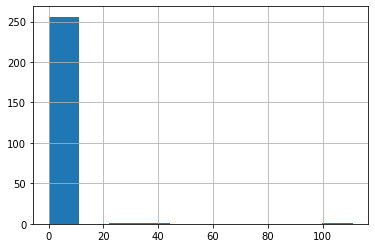

In [20]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count